In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns
import os

from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 

In [2]:
dfg = pd.read_csv('Data.csv')
dfe = dfg[dfg['genre'] != 'Country']
df = dfg[dfg['genre'] == 'Country']

In [3]:
df.describe()

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,...,duration_ms_zscore,energy_zscore,instrumentalness_zscore,liveness_zscore,loudness_zscore,speechiness_zscore,tempo_zscore,valence_zscore,lognorm_duration_zscore,Count_zscore
count,8664.000000,8664.000000,8664.000000,8664.000000,8664.000000,8664.000000,8664.000000,8664.000000,8664.000000,8664.000000,...,8664.000000,8664.000000,8664.000000,8664.000000,8664.000000,8664.000000,8664.000000,8664.000000,8664.000000,8664.000000
mean,154421.398430,46.100416,0.270172,0.577038,217237.527008,0.636318,0.005610,0.187216,-7.341693,0.048989,...,-0.166026,0.212419,-0.450340,-0.139213,0.338827,-0.394352,0.195079,0.353823,-0.081565,-0.340389
std,3887.894645,9.745975,0.262801,0.109771,46500.458530,0.200344,0.041811,0.153139,3.250495,0.048392,...,0.398535,0.768851,0.142970,0.777449,0.547131,0.259805,0.984548,0.860695,0.524680,0.248802
min,123254.000000,0.000000,0.000028,0.192000,41773.000000,0.018800,0.000000,0.014300,-27.119000,0.022300,...,-1.669856,-2.157400,-0.469522,-1.017065,-2.990136,-0.537637,-2.237047,-1.586921,-4.323992,-0.617885
25%,152505.750000,39.000000,0.048000,0.509000,188387.000000,0.493000,0.000000,0.098775,-8.943000,0.029600,...,-0.413292,-0.337586,-0.469522,-0.588208,0.069291,-0.498446,-0.630928,-0.339842,-0.398915,-0.539596
50%,154671.500000,45.000000,0.177000,0.580000,211473.500000,0.668000,0.000001,0.128000,-6.509000,0.034800,...,-0.215427,0.334003,-0.469518,-0.439840,0.478988,-0.470528,0.178476,0.333620,-0.097674,-0.416570
75%,156837.250000,52.000000,0.438000,0.649000,237910.250000,0.800000,0.000044,0.230000,-5.019000,0.045900,...,0.011150,0.840573,-0.469370,0.077987,0.729788,-0.410935,0.881002,1.038405,0.209281,-0.209663
max,159003.000000,82.000000,0.985000,0.964000,826813.000000,0.991000,0.880000,0.994000,-0.521000,0.689000,...,5.058379,1.573564,2.539582,3.956615,1.486902,3.041696,3.259757,2.115161,3.455366,0.908752


In [4]:
cols = df.columns

allpop = dfe[dfe.popular == 'popular']
pop = df[df.popular == 'popular']
nonpop = df[df.popular == 'not-popular']


print(df.corr())


                         Unnamed: 0  popularity  acousticness  danceability  \
Unnamed: 0                 1.000000   -0.681033      0.077713     -0.018223   
popularity                -0.681033    1.000000     -0.034193      0.022790   
acousticness               0.077713   -0.034193      1.000000     -0.043650   
danceability              -0.018223    0.022790     -0.043650      1.000000   
duration_ms                0.039048    0.003960     -0.036201     -0.200838   
energy                    -0.095938    0.052582     -0.698235      0.047057   
instrumentalness           0.044947    0.004714      0.045472     -0.037066   
liveness                   0.060338   -0.071631     -0.051183     -0.077035   
loudness                  -0.124325    0.042379     -0.534730     -0.056025   
speechiness                0.043267   -0.033917     -0.082292      0.158743   
tempo                      0.005623   -0.021031     -0.131720     -0.235978   
valence                   -0.039718    0.052208     

Let's look at count, valence, energy, and liveness.

<ErrorbarContainer object of 3 artists>

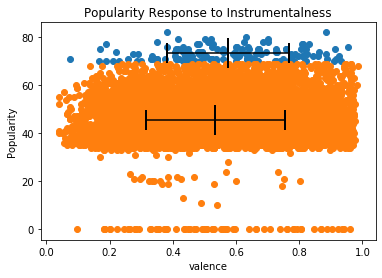

In [6]:
plt.scatter(pop.valence, pop.popularity)
plt.scatter(nonpop.valence, nonpop.popularity)
plt.xlabel("valence")
plt.ylabel("Popularity")
plt.title("Popularity Response to Instrumentalness")

plt.errorbar(np.mean(pop.valence),np.mean(pop.popularity),xerr=np.std(pop.valence),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')
plt.errorbar(np.mean(nonpop.valence),np.mean(nonpop.popularity),xerr=np.std(nonpop.valence),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')

<ErrorbarContainer object of 3 artists>

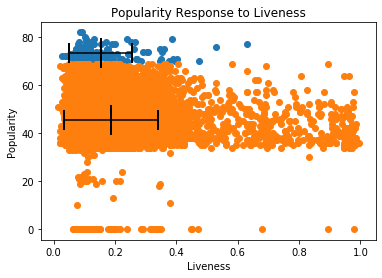

In [7]:
plt.scatter(pop.liveness, pop.popularity)
plt.scatter(nonpop.liveness, nonpop.popularity)
plt.xlabel("Liveness")
plt.ylabel("Popularity")
plt.title("Popularity Response to Liveness")

plt.errorbar(np.mean(pop.liveness),np.mean(pop.popularity),xerr=np.std(pop.liveness),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')
plt.errorbar(np.mean(nonpop.liveness),np.mean(nonpop.popularity),xerr=np.std(nonpop.liveness),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')

<ErrorbarContainer object of 3 artists>

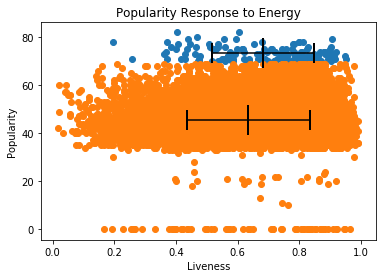

In [8]:
plt.scatter(pop.energy, pop.popularity)
plt.scatter(nonpop.energy, nonpop.popularity)
plt.xlabel("Liveness")
plt.ylabel("Popularity")
plt.title("Popularity Response to Energy")

plt.errorbar(np.mean(pop.energy),np.mean(pop.popularity),xerr=np.std(pop.energy),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')
plt.errorbar(np.mean(nonpop.energy),np.mean(nonpop.popularity),xerr=np.std(nonpop.energy),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')

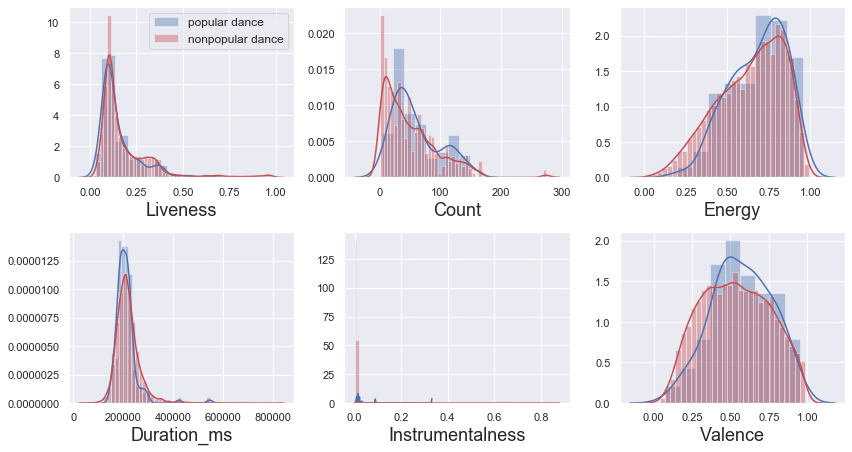

In [9]:

plt.figure(figsize=(20,10))
sns.set()

plt.subplot(331)
sns.distplot(pop.liveness, label='Popular Country')
sns.distplot(nonpop.liveness, color='r', label='=Unpopular Country')
plt.xlabel('Liveness', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(332)
sns.distplot(pop.Count)
sns.distplot(nonpop.Count, color='r')
plt.xlabel('Count', fontsize=18)

plt.subplot(333)
sns.distplot(pop.energy)
sns.distplot(nonpop.energy, color='r')
plt.xlabel('Energy', fontsize=18)

plt.subplot(334)
sns.distplot(pop.duration_ms)
sns.distplot(nonpop.duration_ms, color='r')
plt.xlabel('Duration_ms', fontsize=18)

plt.subplot(335)
sns.distplot(pop.instrumentalness)
sns.distplot(nonpop.instrumentalness, color='r')
plt.xlabel('Instrumentalness', fontsize=18)

plt.subplot(336)
sns.distplot(pop.valence)
sns.distplot(nonpop.valence, color='r')
plt.xlabel('Valence', fontsize=18)

plt.tight_layout()
plt.show()


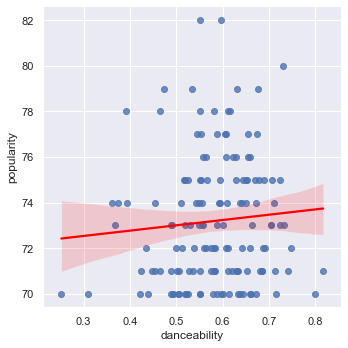

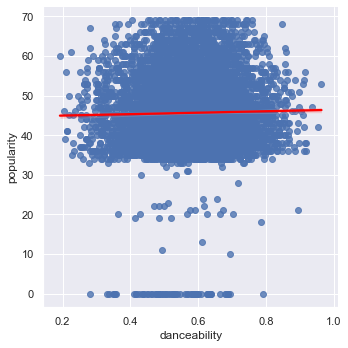

In [10]:
n = sns.lmplot(x='danceability',y='popularity',data=pop,line_kws={'color': 'red'})
print(n)
p = sns.lmplot(x='danceability',y='popularity',data=nonpop,line_kws={'color': 'red'})
print(p)


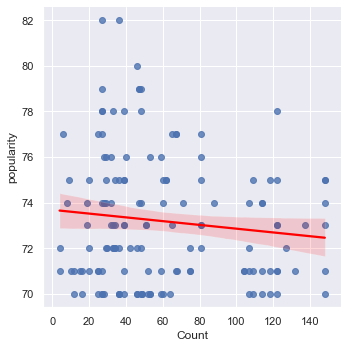

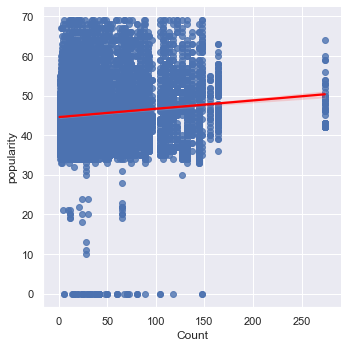

In [13]:
n = sns.lmplot(x='Count',y='popularity',data=pop,line_kws={'color': 'red'})
print(n)
p = sns.lmplot(x='Count',y='popularity',data=nonpop,line_kws={'color': 'red'})
print(p)


Popular songs trend negativley with count, and postiviely with unpopular.

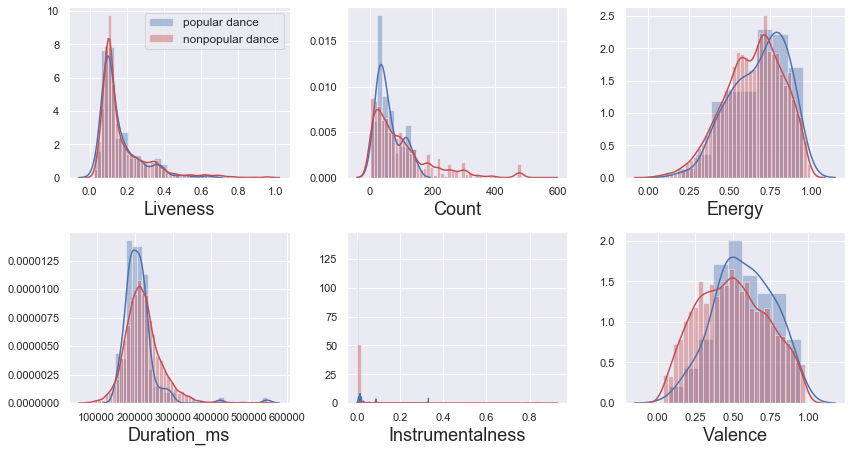

In [14]:
plt.figure(figsize=(20,10))
sns.set()

plt.subplot(331)
sns.distplot(pop.liveness, label='Popular Country')
sns.distplot(allpop.liveness, color='r', label='Other Music')
plt.xlabel('Liveness', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(332)
sns.distplot(pop.Count)
sns.distplot(allpop.Count, color='r')
plt.xlabel('Count', fontsize=18)

plt.subplot(333)
sns.distplot(pop.energy)
sns.distplot(allpop.energy, color='r')
plt.xlabel('Energy', fontsize=18)

plt.subplot(334)
sns.distplot(pop.duration_ms)
sns.distplot(allpop.duration_ms, color='r')
plt.xlabel('Duration_ms', fontsize=18)

plt.subplot(335)
sns.distplot(pop.instrumentalness)
sns.distplot(allpop.instrumentalness, color='r')
plt.xlabel('Instrumentalness', fontsize=18)

plt.subplot(336)
sns.distplot(pop.valence)
sns.distplot(allpop.valence, color='r')
plt.xlabel('Valence', fontsize=18)

plt.tight_layout()
plt.show()


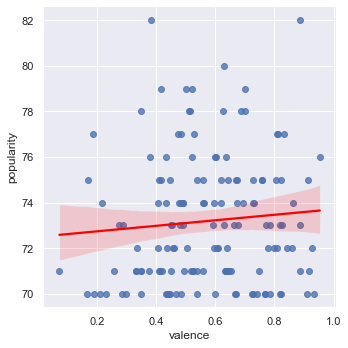

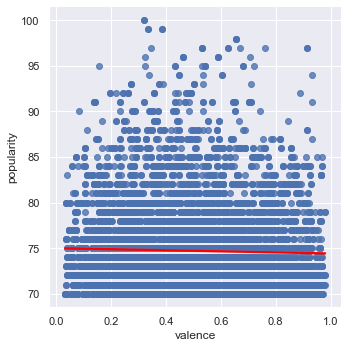

In [15]:
n = sns.lmplot(x='valence',y='popularity',data=pop,line_kws={'color': 'red'})
print(n)
p = sns.lmplot(x='valence',y='popularity',data=allpop,line_kws={'color': 'red'})
print(p)
